>NAMA : AULIA MELYNDA PUTRI
>NIM  : 09011281722066

# LOGIKA FUZZY DALAM SISTEM PENGAMBILAN KEPUTUSAN PENERIMAAN BEASISWA

Antecedent (Inputs)

1. Penilaian Indek Prestasi Kumulatif (IPK)
Dalam penentuan nilai indek prestasi kumulatif (IPK) dibagi menjadi 3 himpunan yaitu : IPK rendah, IPK sedang, IPK tinggi.

2. Jarak Rumah Mahasiswa
Dalam penentuan jarak rumah mahasiswa dibagi menjadi 3 himpunan yaitu : Jarak dekat, Jarak ajak jauh, Jarak jauh. Adapun penilaian jarak rumah mahasiswa ini berdasarkan jarak terjauh dari Universitas Majalengka ke ibu kota kecamatan rumah mahasiswa yang mengajukan beasiswa berdasarkan google map (km).

3. Keadaan Ekonomi Keluarga
Dalam penentuan keadaan ekonomi keluarga dibagi menjadi 3 himpunan yaitu : Keadaan ekonomi tidak mampu, Keadaan ekonomi agak mampu, Keadaan ekonomi mampu. Adapun penilaian untuk keadaan ekonomi keluarga mahasiswa harus menyertakan surat keterangan keadaan ekonomi keluarga dari desa.

Consequent (Output)

Nilai kelayakan nominal beasiswa yang
diberikan.

Rules

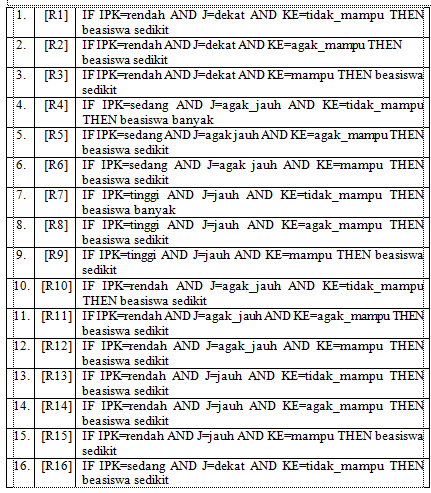

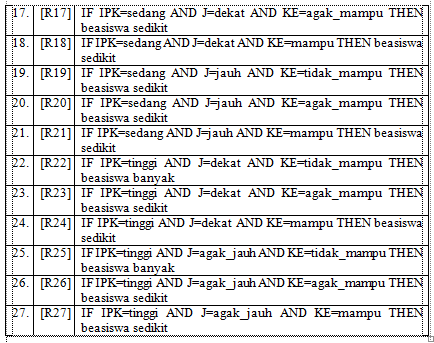

Penerapan metode tsukamoto digunakan untuk menetukan mahasiswa yang layak untuk mendapatkan beasiswa berdasarkan Indeks Prestasi Kumulatif (IPK), keadaan ekonomi keluarga, dan jarak rumah mahasiswa dengan cara melakukan fuzzyfikasi, pembentukan rule, Mesin Inferensi dan defuzzyfykasi.

#  Fuzzyfikasi

Pada tahap ini merupakan proses pembagian
menjadi tiga variabel linguistik dengan
menggunakan fungsi keanggotaan yang nantinya
variabel-variabel tersebut akan digunakan
sebagai masukan dalam penentuan nominal
beasiswa kepada mahasiswa yang layak
menerima beasiswa.

In [2]:
IPK  = ctrl.Antecedent (np.arange(0,5,0.1),'Indeks Prestasi Kumulatif') #Variabel IPK untuk Indeks Prestasi Kumulatif dengan nilai 0 sampai 4 dengan range 1, Antecedent adalah library untuk 'Input'
JRM  = ctrl.Antecedent (np.arange(0,60,0.5),'Jarak Rumah Mahasiswa') #Variabel JRM untuk Jarak Rumah Mahasiswa dengan nilai 0 sampai 50 dengan range 0.5, Antecedent adalah library untuk 'Input'
KEK  = ctrl.Antecedent (np.arange(0,4000,1),'Keadaan Ekonomi Keluarga') #Variabel KEK untuk Kondisi Ekonomi Keluarga dengan nilai 0 sampai 3000 dengan range 1, Antecedent adalah library untuk 'Input'
NKNB = ctrl.Consequent (np.arange(0,4000,1),'Nilai Kelayakan Nominal Beasiswa') #Variabel NKNB untuk Nilai Kelayakan Nominal Beasiswa dengan nilai 0 sampai 4000 dengan range 1, Consequent adalah library untuk 'Output'

1. Penilaian Indek Prestasi Kumulatif (IPK)
    Dalam penentuan nilai indek prestasi kumulatif (IPK) dibagi menjadi 3 himpunan yaitu : IPK
    rendah, IPK sedang, IPK tinggi. Adapun penilaian IPK ini dapat kita lihat dari gambar grafik
    dibawah ini:

$IPK [Rendah] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 1 \\
       {2.5-x \over 1.5} & \mbox{; } 1 ≤ x ≤ 2.5 \\
       0 & \mbox{; } x \geq 2.5
    \end{array}
\right.$

$IPK [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 1.5 atau \geq 3.5 \\
       {x-1.5 \over 1} & \mbox{; } 1,5 ≤ x ≤ 2.5 \\
       {3.5-x \over 1} & \mbox{; } 2,5 ≤ x ≤ 3.5 \\
    \end{array}
\right.$

$IPK [Tinggi] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2.5 \\
       {x-2.5 \over 1.5} & \mbox{; } 2.5 ≤ x ≤ 4 \\
       1 & \mbox{; } x \geq 4
    \end{array}
\right.$

C:\File Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


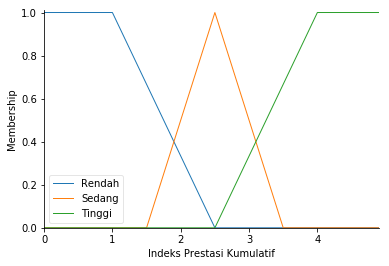

In [3]:
IPK['Rendah'] = fuzz.trapmf(IPK.universe,[0,0,1,2.5]) #Membership function IPK Rendah, dalam bentuk trapesium dengan nilai 0 - 2.5
IPK['Sedang'] = fuzz.trimf(IPK.universe,[1.5,2.5,3.5]) #Membership function IPK Sedang, dalam bentuk segitiga dengan nilai 1.5 - 3.5
IPK['Tinggi'] = fuzz.trapmf(IPK.universe,[2.5,4,5,5]) #Membership function IPK Tinggi, dalam bentuk trapesium dengan nilai 2.5 - 4
IPK.view() #Mencetak membership function IPK dalam satu grafik

2. Jarak Rumah Mahasiswa
    
    Dalam penentuan jarak rumah mahasiswa dibagi menjadi 3 himpunan yaitu : Jarak dekat, Jarak ajak 
    jauh, Jarak jauh. Adapun penilaian jarak rumah mahasiswa ini berdasarkan jarak terjauh dari 
    Universitas Majalengka ke ibu kota kecamatan rumah mahasiswa yang mengajukan beasiswa
    berdasarkan google map (km).dapat di lihat pada gambar fungsi keanggotaan variabel jarak rumah
    mahasiswa dibawah ini

$JRM [Dekat] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 1 \\
       {25-x \over 24} & \mbox{; } 1 ≤ x ≤ 25 \\
       0 & \mbox{; } x \geq 25
    \end{array}
\right.$

$JRM [Agak Jauh] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 12.5 atau \geq 37.5 \\
       {x-12.5 \over 12.5} & \mbox{; } 12,5 ≤ x ≤ 25 \\
       {37.5-x \over 12.5} & \mbox{; } 25 ≤ x ≤ 37.5 \\
    \end{array}
\right.$

$JRM [Jauh] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 25 \\
       {x-25 \over 25} & \mbox{; } 25 ≤ x ≤ 50 \\
       1 & \mbox{; } x \geq 50
    \end{array}
\right.$

C:\File Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


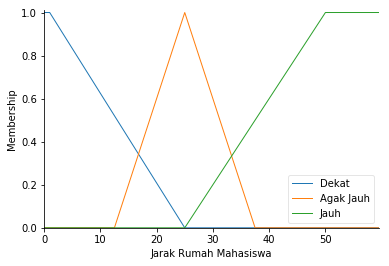

In [4]:
JRM['Dekat']     = fuzz.trapmf(JRM.universe,[0,0,1,25]) #Membership function JRM Dekat, dalam bentuk trapesium dengan nilai 0 - 25
JRM['Agak Jauh'] = fuzz.trimf(JRM.universe,[12.5,25,37.5]) #Membership function JRM Agak Jauh, dalam bentuk segitiga dengan nilai 12.5 - 37.5
JRM['Jauh']      = fuzz.trapmf(JRM.universe,[25,50,60,60]) #Membership function JRM Jauh, dalam bentuk trapesium dengan nilai 25 - 50
JRM.view() #Mencetak membership function JRM dalam satu grafik

3. Keadaan Ekonomi Keluarga
    
    Dalam penentuan keadaan ekonomi keluarga dibagi menjadi 3 himpunan yaitu : Keadaan ekonomi tidak 
    mampu, Keadaan ekonomi agak mampu, Keadaan ekonomi mampu. Adapun penilaian untuk keadaan ekonomi
    keluarga mahasiswa harus menyertakan surat keterangan keadaan ekonomi keluarga dari desa dapat
    dilihat pada gambar fungsi keanggotaan variabel keadaan ekonomi keluarga sebagai berikut ini :

$KEK [Tidak Mampu] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 1000000 \\
       {2000000-x \over 1000000} & \mbox{; } 1000000 ≤ x ≤ 2000000 \\
       0 & \mbox{; } x \geq 2000000
    \end{array}
\right.$

$JRM [Agak Mampu] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 1500000 atau \geq 2500000 \\
       {x-1500000 \over 500000} & \mbox{; } 1500000 ≤ x ≤ 2000000 \\
       {2500000-x \over 500000} & \mbox{; } 2000000 ≤ x ≤ 2500000 \\
    \end{array}
\right.$

$JRM [Mampu] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 200000 \\
       {x-2000000 \over 1000000} & \mbox{; } 2000000 ≤ x ≤ 3000000 \\
       1 & \mbox{; } x \geq 3000000
    \end{array}
\right.$

C:\File Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


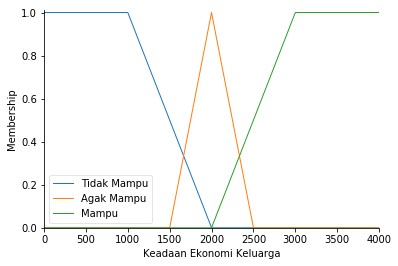

In [5]:
KEK ['Tidak Mampu'] = fuzz.trapmf (KEK.universe,[0,0,1000,2000]) #Membership function KEK Tidak Mampu, dalam bentuk trapesium dengan nilai 1000 - 2000
KEK ['Agak Mampu'] = fuzz.trimf (KEK.universe,[1500,2000,2500]) #Membership function KEK Agak Mampu, dalam bentuk segitiga dengan nilai 2000 - 2500
KEK ['Mampu']  = fuzz.trapmf (KEK.universe,[2000,3000,4000,4000]) #Membership function KEK Mampu, dalam bentuk trapesium dengan nilai 2000 - 3000
KEK.view() #Mencetak membership function KEK dalam satu grafik

4. Nilai Kelayakan Nominal Beasiswa

Untuk menetukan kriteria penentuan adapun
nilai kelayakan nominal beasiswa yang
diberikan dapat dilihat pada gambar fungsi
keanggotaan variabel nilai kelayakan nominal
beasiswa yang diberikan sebagai berikut :

$Nominal [Sedikit] (z) =
\left\{
    \begin{array}{ll}
       1 & \mbox{; } z \leq 1.000.000 \\
       {3.000.000-z \over 2.000.000} & \mbox{; } 1.000.000 ≤ z ≤ 2.000.000 \\
       0 & \mbox{; } z \geq 3.000.000
    \end{array}
\right.$

$Nominal [Banyak] (z) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } z \leq 1.000.000 \\
       {z-1.000.000\over 2.000.000} & \mbox{; } 1.000.000 ≤ z ≤ 3.000.000 \\
       1 & \mbox{; } z \geq 3.000.000
    \end{array}
\right.$


C:\File Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


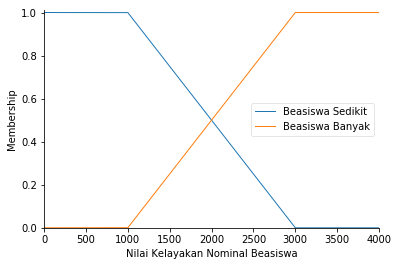

In [6]:
NKNB ['Beasiswa Sedikit'] = fuzz.trapmf (NKNB.universe,[0,0,1000,3000]) #Membership function NKNB Sedikit, dalam bentuk trapesium dengan nilai 1000 - 3000
NKNB ['Beasiswa Banyak'] = fuzz.trapmf (NKNB.universe,[1000,3000,4000,4000]) #Membership function NKNB Banyak, dalam bentuk trapesium dengan nilai 1000 - 3000
NKNB.view() #Mencetak membership function NKNB dalam satu grafik

# Fuzzy rules

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa138c50>)

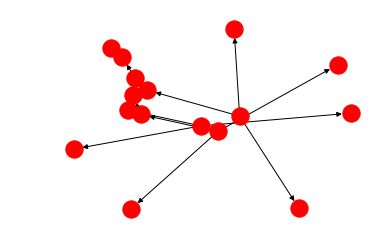

In [7]:
#Pada bagian inilah kita dapat mengetahui jumlah beasiswa yang dikeluarkan berdasarkan rule
#Membuat Rule Base untuk menentukan Nilai Kelayakan Nominal Beasiswa
#Karena Input ada 3 dan setiap Input memiliki 3 kondisi maka Rule Base yang didapat 3^3 = 27
rule1 = ctrl.Rule (IPK['Rendah']& JRM ['Dekat']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Sedikit'])
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa1bd3c8>)

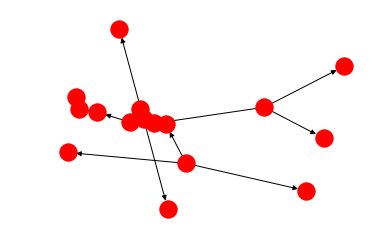

In [8]:
rule2 = ctrl.Rule (IPK['Rendah']& JRM ['Dekat']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa25a668>)

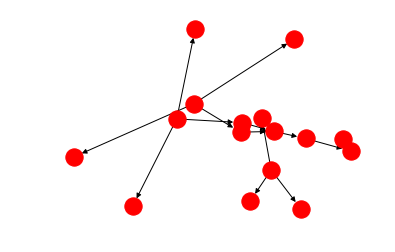

In [9]:
rule3 = ctrl.Rule (IPK['Rendah']& JRM ['Dekat']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x90e58d0>)

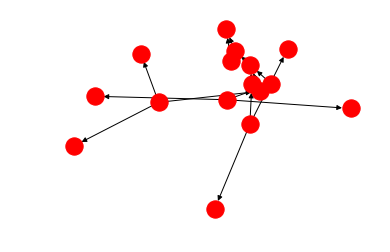

In [10]:
rule4 = ctrl.Rule (IPK['Sedang']& JRM ['Agak Jauh']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Banyak'])
rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x8fab2b0>)

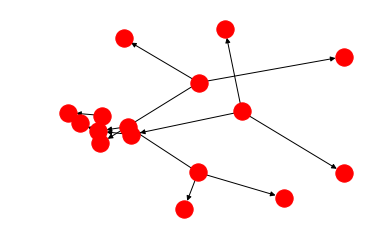

In [11]:
rule5 = ctrl.Rule (IPK['Sedang']& JRM ['Agak Jauh']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule5.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa1186a0>)

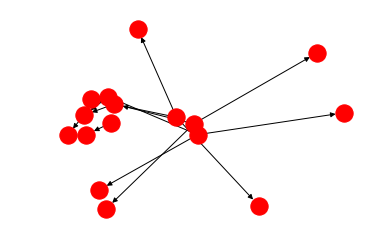

In [12]:
rule6 = ctrl.Rule (IPK['Sedang']& JRM ['Agak Jauh']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule6.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x90ec1d0>)

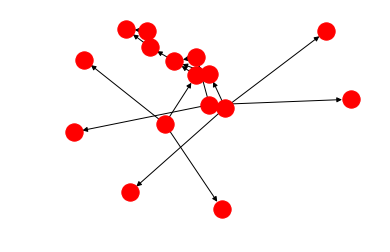

In [13]:
rule7 = ctrl.Rule (IPK['Tinggi']& JRM ['Jauh']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Banyak'])
rule7.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa2e6908>)

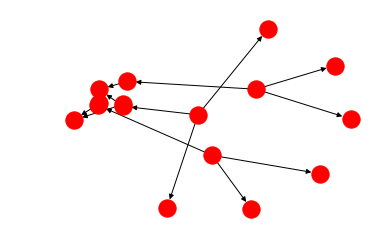

In [14]:
rule8 = ctrl.Rule (IPK['Tinggi']& JRM ['Jauh']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule8.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa353f28>)

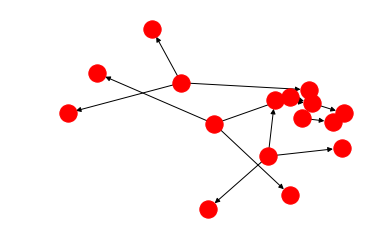

In [15]:
rule9 = ctrl.Rule (IPK['Tinggi']& JRM ['Jauh']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule9.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa3ca630>)

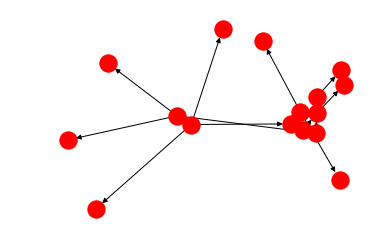

In [16]:
rule10 = ctrl.Rule (IPK['Rendah']& JRM ['Agak Jauh']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Sedikit'])
rule10.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa43b978>)

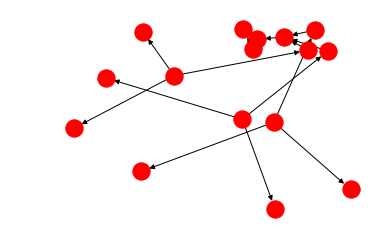

In [17]:
rule11 = ctrl.Rule (IPK['Rendah']& JRM ['Agak Jauh']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule11.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa4a8550>)

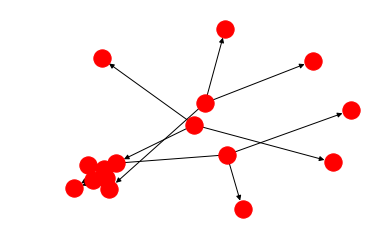

In [18]:
rule12 = ctrl.Rule (IPK['Rendah']& JRM ['Agak Jauh']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule12.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa5199b0>)

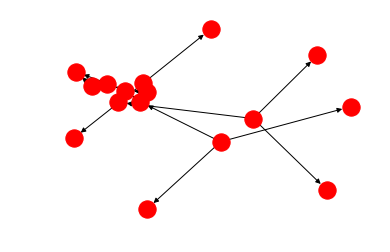

In [19]:
rule13 = ctrl.Rule (IPK['Rendah']& JRM ['Jauh']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Sedikit'])
rule13.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa5900f0>)

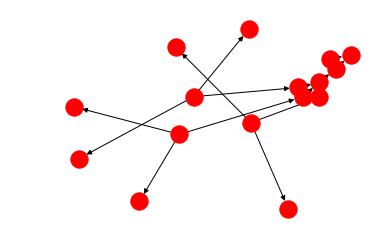

In [20]:
rule14 = ctrl.Rule (IPK['Rendah']& JRM ['Jauh']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule14.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa5f89b0>)

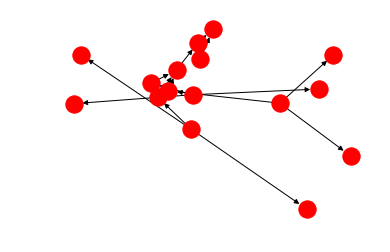

In [21]:
rule15 = ctrl.Rule (IPK['Rendah']& JRM ['Jauh']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule15.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb63ab70>)

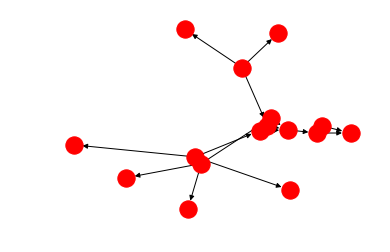

In [22]:
rule16 = ctrl.Rule (IPK['Sedang']& JRM ['Dekat']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Sedikit'])
rule16.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb6b3320>)

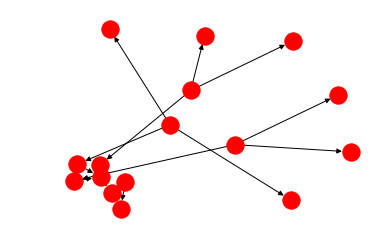

In [23]:
rule17 = ctrl.Rule (IPK['Sedang']& JRM ['Dekat']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule17.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb71eb00>)

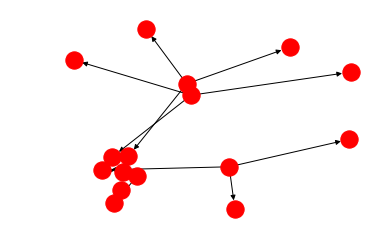

In [24]:
rule18 = ctrl.Rule (IPK['Sedang']& JRM ['Dekat']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule18.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb78beb8>)

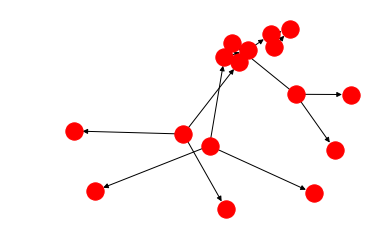

In [25]:
rule19 = ctrl.Rule (IPK['Sedang']& JRM ['Jauh']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Sedikit'])
rule19.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb807630>)

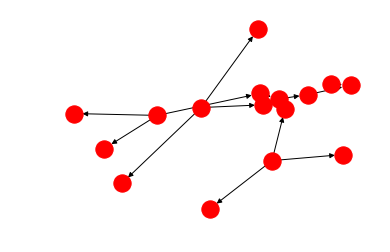

In [26]:
rule20 = ctrl.Rule (IPK['Sedang']& JRM ['Jauh']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule20.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb87d400>)

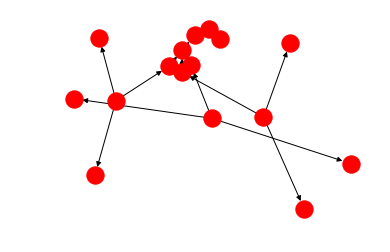

In [27]:
rule21 = ctrl.Rule (IPK['Sedang']& JRM ['Jauh']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule21.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb8ec588>)

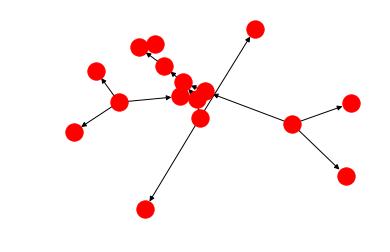

In [28]:
rule22 = ctrl.Rule (IPK['Tinggi']& JRM ['Dekat']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Banyak'])
rule22.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb958c88>)

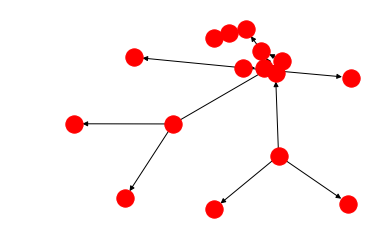

In [29]:
rule23 = ctrl.Rule (IPK['Tinggi']& JRM ['Dekat']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule23.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb9cf470>)

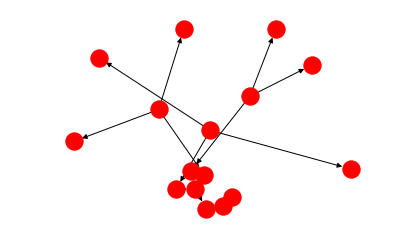

In [30]:
rule24 = ctrl.Rule (IPK['Tinggi']& JRM ['Dekat']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule24.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xba3f780>)

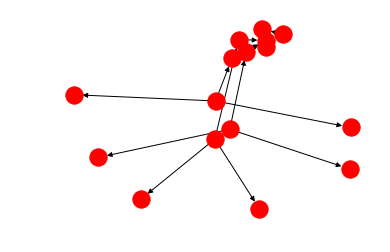

In [31]:
rule25 = ctrl.Rule (IPK['Tinggi']& JRM ['Agak Jauh']& KEK ['Tidak Mampu'],NKNB ['Beasiswa Banyak'])
rule25.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbaa9f98>)

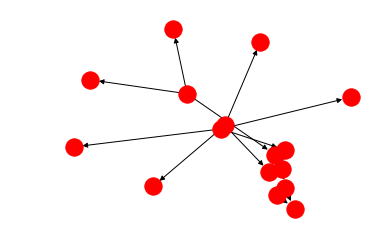

In [32]:
rule26 = ctrl.Rule (IPK['Tinggi']& JRM ['Agak Jauh']& KEK ['Agak Mampu'],NKNB ['Beasiswa Sedikit'])
rule26.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbb20630>)

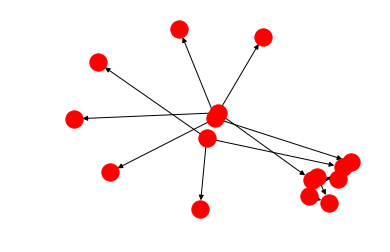

In [33]:
rule27 = ctrl.Rule (IPK['Tinggi']& JRM ['Agak Jauh']& KEK ['Mampu'],NKNB ['Beasiswa Sedikit'])
rule27.view()

# Mesin Inferensi

Pada tahap mesin inferensi, dalam menentukan nominal beasiswa yang diberikan di Fakultas Teknik Universitas Majalengka akan menerapkan fungsi MIN untuk setiap rule (aturan) yang digunakan pada aplikasi fungsi implikasinya.

# Kontrol Sistem

In [34]:
#Membuat kontrol sistem yang kondisinya diambil berdasarkan rule yang telah dibuat 
NilaiKelayakanNominalBeasiswa_rule1 = ctrl.ControlSystem ([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule8, rule9,
                                       rule10, rule11,rule12, rule13, rule14, rule15, rule16, rule17, rule18,
                                       rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])

In [35]:
#Membuat simulasi kontrol sistem yang kondisinya diambil berdasarkan sistem kontrol yang kita buat
NilaiKelayakanNominalBeasiswa_rule = ctrl.ControlSystemSimulation (NilaiKelayakanNominalBeasiswa_rule1)

In [36]:
#Membuat interupsi yang meminta inputan dari keyboard
IPK = input ('IndeksPrestasiKumulatif :') #Inputan untuk memasukkan nilai Indeks Prestasi Kumulatif
JRM = input ('JarakRumahMahasiswa :') #Inputan untuk memasukkan jarak rumah 
KEK = input ('KondisiEkonomiKeluarga :') #Inputan untuk memasukkan kondisi ekonomi keluarga

IndeksPrestasiKumulatif :4.0
JarakRumahMahasiswa :4.1
KondisiEkonomiKeluarga :2000


In [37]:
NilaiKelayakanNominalBeasiswa_rule.input['Indeks Prestasi Kumulatif'] = float(IPK) #Merubah format data nilai Indeks Prestasi Kumulatif menjadi float, dan akan dimasukkan kedalam kontrol sistem
NilaiKelayakanNominalBeasiswa_rule.input['Jarak Rumah Mahasiswa'] = float(JRM) #Merubah format data nilai Jarak Rumah menjadi float, dan akan dimasukkan kedalam kontrol sistem
NilaiKelayakanNominalBeasiswa_rule.input['Keadaan Ekonomi Keluarga'] = float(KEK) #Merubah format data nilai Kondisi Ekonomi Keluarga menjadi float, dan akan dimasukkan kedalam kontrol sistem

NilaiKelayakanNominalBeasiswa_rule.compute() #Menghitung jumlahnya

1123.9454229180405


C:\File Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


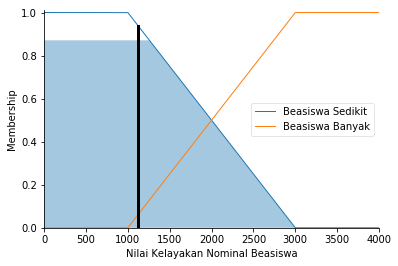

In [38]:
print(NilaiKelayakanNominalBeasiswa_rule.output['Nilai Kelayakan Nominal Beasiswa']) #Mencetak nominal beasiswa yang telah ditentukan
NKNB.view(sim=NilaiKelayakanNominalBeasiswa_rule)

#  Defuzzyfikasi

$$z=\frac{\ a1 z1 \ + ... + \ an zn}{\ a1 +...+ \ an}$$

$$z=\frac{0,25 * 2.000.000 + 0,75 * 2.333.333 + 0,25 * 2.166.666 + 0,75 * 2.333.333}
{0,25+0,75}$$

$$z= \frac{500.000 + 1.749.999 + 541.666 + 1.749.999}
{1}$$

$$z=\frac {4.541.664}
{1}$$

$$z=4.541.664$$

Penjelasan untuk mencari nilai Z, dan nilai a :

Nilai z1

$$z1=\frac{2*(2.000.000 + 1.000.000)}{3}$$

$$z1=\frac{2*3.000.000}{3}$$

$$z1=\frac{6.000.000}{3}$$

$$z1=2.000.000$$

Nilai z2

$$z2=\frac{2*(2.000.000 + 1.500.000)}{3}$$

$$z2=\frac{2*3.500.000}{3}$$

$$z2=\frac{7.000.000}{3}$$

$$z2=2.333.333$$

Nilai z3

$$z3=\frac{2.000.000 + 1 (3.000.000 - 2.500.000}{3}$$

$$z3=\frac{2.000.000 + 1 (500.000}{3}$$

$$z3=\frac{2.000.000 + 500.000}{3}$$

$$z3={2.000.000 + 166.666} $$

$$z3=2.166.666$$

Nilai z4

$$z4=\frac{2.000.000 + 1 (3.000.000 - 2.000.000}{3}$$

$$z4=\frac{2.000.000 + 1 (1.000.000}{3}$$

$$z4=\frac{2.000.000 + 1.000.000} {3}$$

$$z4=2.000.000 + 333.333$$

$$z4=2.333.333$$




Nilai a1

$$a1=\frac{3000 - 2500} {3000 - 1000}$$

$$a1=\frac{500} {2000}$$

$$a1= 0,25$$

Nilai a2

$$a2=\frac{2500 - 1000} {3000 - 1000}$$

$$a2=\frac{1500} {2000}$$

$$a2= 0,75$$